Решить задачу: кластеризации/классификации 

На выборке: MNIST 

С использованием моделей: PCA + K-means 

Со структурным параметром: количество главных компонент в PCA 


С критериями качества: однородность кластеров, Accuracy

In [2]:
import numpy as np
from sklearn import datasets, metrics
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\Poly\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Загружаем данные

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Приводим данные к двумерному виду

In [4]:
data_test=x_test.reshape((len(x_test),-1))
data_train=x_train.reshape((len(x_train),-1))

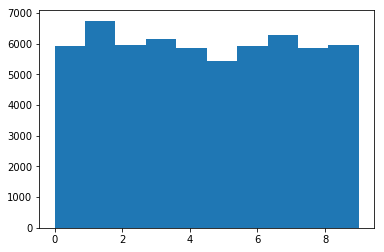

In [18]:
plt.hist(y_train, bins=10)
plt.show()

Как можно заметить по гистограмме, у нас очень равномерная выборка, размеры классов практически одинаковы.

In [26]:
from scipy.stats import describe
describe(data_train)

DescribeResult(nobs=60000, minmax=(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 

Как видно, пропусков в данных нет, так что работаем целиком сразу со всем набором.

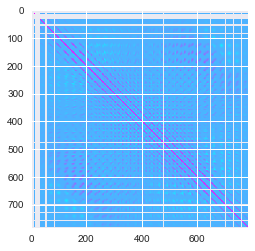

In [59]:
data = np.corrcoef(data_train, rowvar=False)
plt.imshow(data, cmap='cool')
plt.show()

Посмотрим на график корреляций признаков (чем розовее, тем больше признаки кореллируют). По ощущениям, розовые оттенки есть где то в правом верхнем и левом нижнем углах, но в основном признаки коррелируют несильно.

В цикле будем перебирать различные количества компонент PCA, чтобы найти наиболее подходящее число
На данном этапе мы решаем задачу кластеризации, то есть обучение без учителя: мы не используем для разметки ответы из y_train, а просто разбиваем выборку на кластеры.

In [5]:
from sklearn.metrics import homogeneity_score

In [79]:
scores = []
pca_numbers = [3, 30, 100, 300, 500] # возможные количества компонент
for comp in pca_numbers:
    pca=PCA(n_components=comp)
    x_train_pca = pca.fit_transform(data_train) # обучаем PCA для сжатия и одновременно сжимаем data_train
    x_test_pca = pca.transform(data_test) # сжимаем data_test
    kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train_pca) # обучаем метод
    y_pred = kmeans.predict(x_test_pca) # предсказываем кластеры для новых чисел
    hs = homogeneity_score(y_test, y_pred) # метрика однородности, она чем больше, тем лучше
    print('number of components in pca: ', comp, ', homogeneity score: ', hs)
    scores.append([comp, hs])

number of components in pca:  3 , homogeneity score:  0.3510942795554751
number of components in pca:  30 , homogeneity score:  0.490947058193717
number of components in pca:  100 , homogeneity score:  0.49314194189850974
number of components in pca:  300 , homogeneity score:  0.49338453467107996
number of components in pca:  500 , homogeneity score:  0.5051030521327285


In [80]:
scores = np.array(scores)

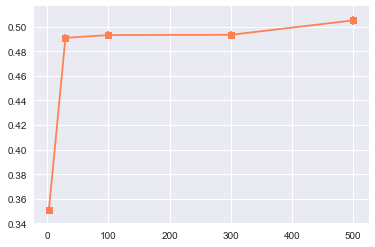

In [81]:
plt.errorbar(scores[:, 0], scores[:, 1], np.var(scores[:, 1]), marker='s', color='coral')
plt.show()

In [7]:
pca=PCA(n_components=2)
x_train_pca = pca.fit_transform(data_train) # обучаем PCA для сжатия и одновременно сжимаем data_train
x_test_pca = pca.transform(data_test) # сжимаем data_test
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train_pca) # обучаем метод
y_pred = kmeans.predict(x_test_pca) # предсказываем кластеры для новых чисел

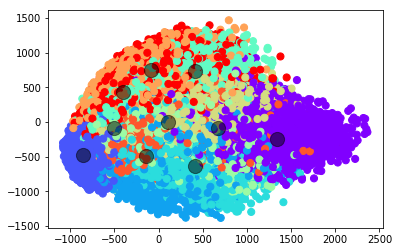

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = cm.cool(np.linspace(0, 1, len(y_train)))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, s=50, cmap=cm.rainbow)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Как мы видим, однородность кластеров не достигает достаточно больших значений, и, начиная с 30 компонент, практически не меняется.
Если оценивать график, то можно заметить, что границы классов довольно выражены, хотя некоторые погрешности все же есть и элементы попадают не туда.

Решаем задачу классификации, по сути все тоже самое, только обучение с учителем, то есть мы знаем ответы для x_train и можем их использовать для лучшего обучения. Воспользуемся классификатором логистической регресии.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
scores = []
pca_numbers = [3, 10, 30, 100] # возможные количества компонент
for comp in pca_numbers:
    pca=PCA(n_components=comp)
    x_train_pca = pca.fit_transform(data_train) # обучаем PCA для сжатия и одновременно сжимаем data_train
    x_test_pca = pca.transform(data_test) # сжимаем data_test
    lr = LogisticRegression()
    lr.fit(x_train_pca, y_train) # обучаем метод
    y_pred = lr.predict(x_test_pca) # предсказываем классы для новых данных
    acs = accuracy_score(y_test, y_pred) # метрика точности, она чем больше, тем лучше
    print('number of components in pca: ', comp,', accuracy score: ', acs)
    scores.append([comp, acs])

number of components in pca:  3 , accuracy score:  0.4564
number of components in pca:  10 , accuracy score:  0.7885
number of components in pca:  30 , accuracy score:  0.8871
number of components in pca:  100 , accuracy score:  0.9145


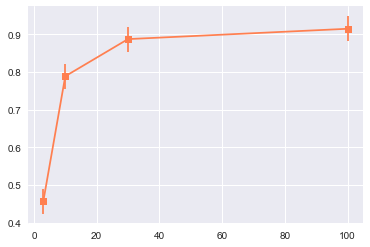

In [83]:
scores = np.array(scores)
plt.errorbar(scores[:, 0], scores[:, 1], np.var(scores[:, 1]), marker='s', color='coral')
plt.show()

С ростом числа компонент растет и точность классификации, которая уже даже на значении 30 принимает неплохие значения. Проверка большего количества компонент занимает длительное время и дает не такой уж большой выигрыш в точности.